In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# list of publications
pub_list = ['buzzfeednews', 'cnn', 'vox','atlantic', 'guardian', 'washingtonpost', 'newyorktimes', 'npr', 'reuters', 'newyorkpost', 'foxnews', 'nationalreview', 'breitbart']

# reading in our data
data_dict = {}
for i in pub_list:
    data_dict[i] = pd.read_csv(f'./data/{i}.csv')
    data_dict[i].dropna(inplace = True)


In [5]:
# function to get X amount of topics
def get_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topics = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_dict[topic_idx] = topics.split()
    return topic_dict

In [26]:
# function to return the top topics of publication
def top_topics(data, column):
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1, max_features=1000, stop_words='english')
    tf = tf_vectorizer.fit_transform(data[column])
    tf_feature_names = tf_vectorizer.get_feature_names()

    lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
    return lda, tf_feature_names

In [31]:
# create dictionary of article topics per publication
topic_dicts = {}
for i in data_dict:
    model, tf_feature_names = top_topics(data_dict[i], 'content')
    topics = get_topics(model, tf_feature_names, 10)
    topic_dicts[i] = topics

In [32]:
# create dicitonary of title topics per publication
topic_dicts_t = {}
for i in data_dict:
    model, tf_feature_names = top_topics(data_dict[i], 'title')
    topics = display_topics(model, tf_feature_names, 10)
    topic_dicts_t[i] = topics

In [8]:
# creating list of publications per political bias
LEFT = ['buzzfeednews', 'cnn', 'vox']
left = ['guardian', 'atlantic', 'washingtonpost', 'newyorktimes']
center = ['npr', 'reuters']
right = ['newyorkpost']
RIGHT = ['foxnews', 'nationalreview', 'breitbart']

In [9]:
# create dictionary of the top topics
hot_topics = {}

for i in topic_dicts:
    for j in topic_dicts[i]:
        for k in topic_dicts[i][j]:
            if k not in hot_topics.keys():
                hot_topics[k] = 1
            else:
                hot_topics[k] += 1

In [10]:
# create dictionary of topics for LEFT publications 
LEFT_topics = {}
for i in LEFT:
    for j in topic_dicts[i]:
        for k in topic_dicts[i][j]:
            if k not in LEFT_topics.keys():
                LEFT_topics[k] = 1
            else:
                LEFT_topics[k] += 1

In [11]:
# create dictionary of topics for left publications 
left_topics = {}
for i in left:
    for j in topic_dicts[i]:
        for k in topic_dicts[i][j]:
            if k not in left_topics.keys():
                left_topics[k] = 1
            else:
                left_topics[k] += 1

In [12]:
# create dictionary of topics for center publications 
center_topics = {}
for i in center:
    for j in topic_dicts[i]:
        for k in topic_dicts[i][j]:
            if k not in center_topics.keys():
                center_topics[k] = 1
            else:
                center_topics[k] += 1

In [13]:
# create dictionary of topics for right publications 
right_topics = {}
for i in right:
    for j in topic_dicts[i]:
        for k in topic_dicts[i][j]:
            if k not in right_topics.keys():
                right_topics[k] = 1
            else:
                right_topics[k] += 1

In [14]:
# create dictionary of topics for RIGHT publications 
RIGHT_topics = {}
for i in RIGHT:
    for j in topic_dicts[i]:
        for k in topic_dicts[i][j]:
            if k not in RIGHT_topics.keys():
                RIGHT_topics[k] = 1
            else:
                RIGHT_topics[k] += 1

In [15]:
# creating dictionary of topics per political bias
political_topics = {}
political_topics['LEFT'] = LEFT_topics
political_topics['left'] = left_topics
political_topics['center'] = center_topics
political_topics['right'] = right_topics
political_topics['RIGHT'] = RIGHT_topics

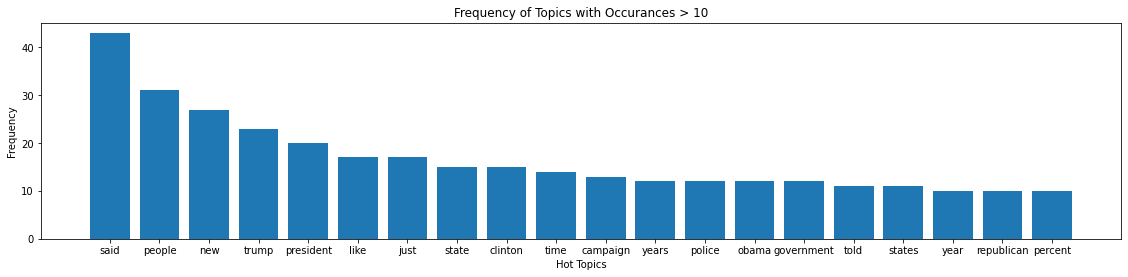

In [16]:
# sorting the topics by frequency amongst all publications
hot_topics_sorted = sorted(hot_topics.items(), key= lambda x: x[1], reverse= True)

# creating the data for our figure
y = []
x = []
for i in hot_topics_sorted:
    if i[1] >= 10:
        y.append(i[1])
for i in hot_topics_sorted:
    if i[1] >= 10:
        x.append(i[0])

# creating our figure
fig = plt.figure(figsize=(15, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.xlabel('Hot Topics')
plt.ylabel('Frequency')
plt.title('Frequency of Topics with Occurances > 10')
plt.show()

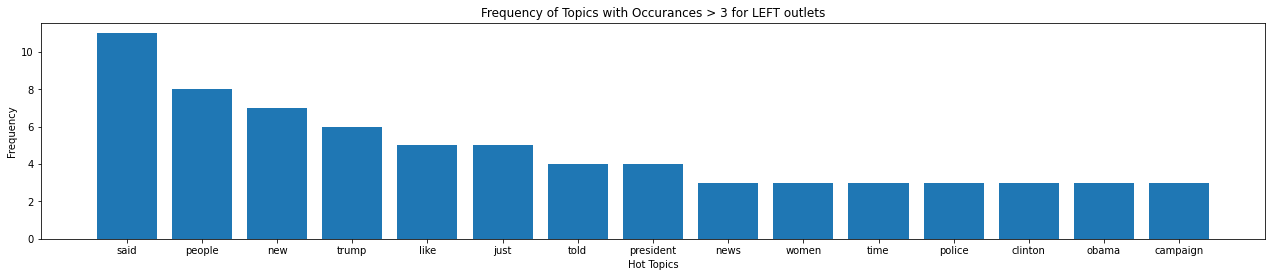

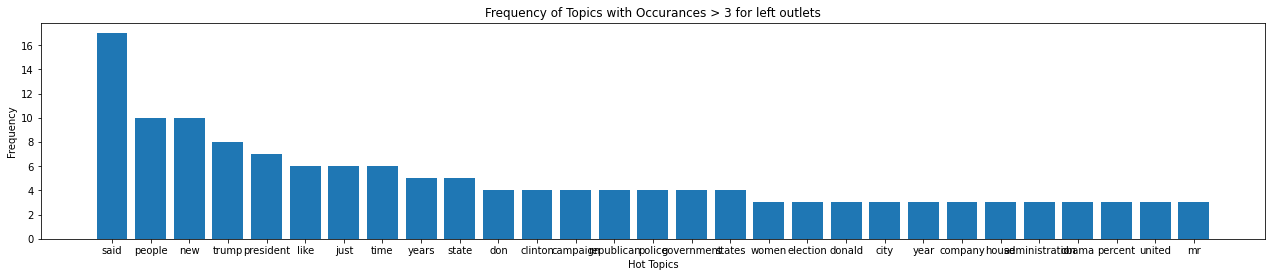

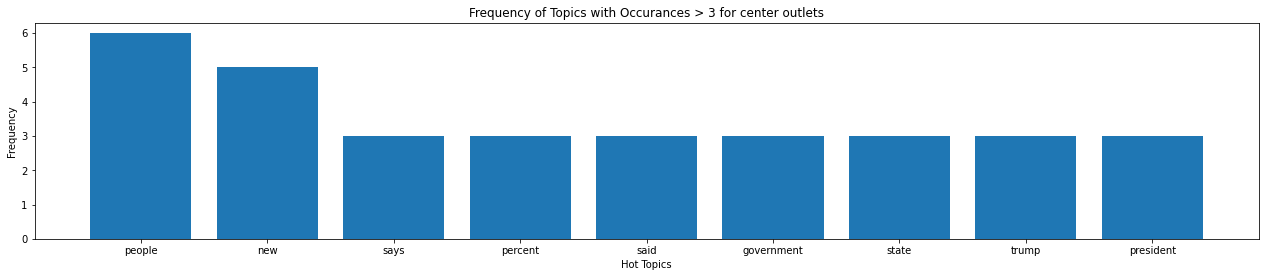

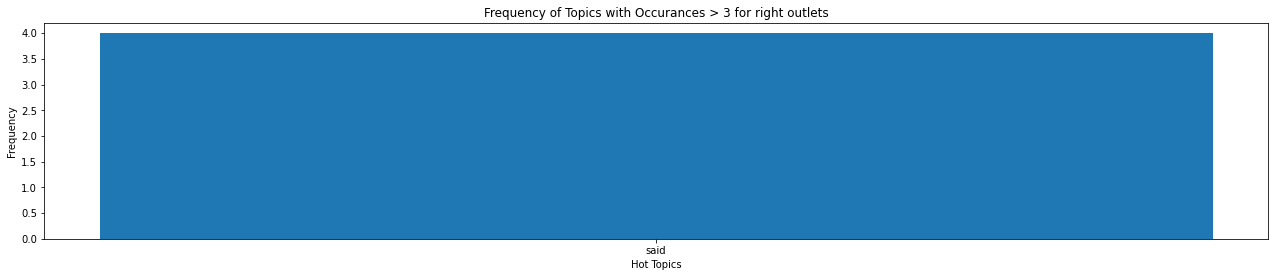

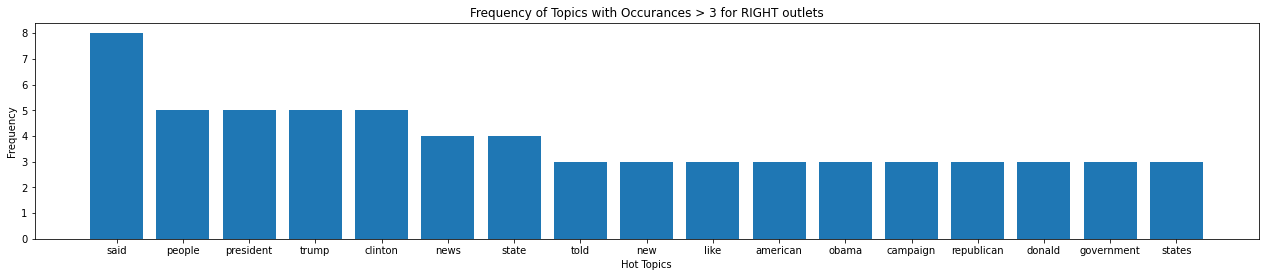

In [17]:
# plotting top topics for each political bias
for i in political_topics:
    poltical_topics_sorted = sorted(political_topics[i].items(), key= lambda x: x[1], reverse= True)
    y = []
    x = []
    for j in poltical_topics_sorted:
        if j[1] >= 3:
            y.append(j[1])
    for k in poltical_topics_sorted:
        if k[1] >= 3:
            x.append(k[0])


    fig = plt.figure(figsize=(17, 3))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    plt.xlabel('Hot Topics')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Topics with Occurances > 3 for {i} outlets')
    plt.show()

In [38]:
df = pd.concat([data_dict[i] for i in data_dict])

In [42]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(['new', 'time', 'just', 'like', 'said'])

cvec = CountVectorizer(min_df = 10, stop_words = stop_words)
cvec.fit(df['title'])
X1 = cvec.transform(df['title'])
X_df = pd.DataFrame(X1.todense(), columns=cvec.get_feature_names())